Code to analyze gas temperature in a 2k bottle

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from ctREFPROP.ctREFPROP import REFPROPFunctionLibrary
import os
from refprop_functions import *


# https://refprop-docs.readthedocs.io/en/latest/DLL/high_level.html#f/_/REFPROPdll

In [2]:
volume = 0.040				# cubic meters
p_init = 2000				# psi
t_init = 280				# Kelvin
mdot_out = 0.105 		# kg/s
dt = 0.1					# seconds
fluid_to_use = "NITROGEN"	# name of fluid to use for simulation
p_init_pa = convert_psi_to_pa(p_init)

In [3]:
# isothermal
density_isotherm = [fluid_density_from_P_T(fluid_to_use, p_init_pa, t_init)]
mass_isotherm = [density_isotherm[0]*volume]
gas_temp_isotherm = [t_init]
gas_pressure_isotherm = [p_init_pa]
time_vec_isotherm = [0]
i = 0
while gas_pressure_isotherm[i] > 9000000:
	time_vec_isotherm += [time_vec_isotherm[i]+dt]
	# use gamma from previous timestep
	gamma = fluid_gamma_from_P_T(fluid_to_use, gas_pressure_isotherm[i], gas_temp_isotherm[i])
	mass_isotherm += [mass_isotherm[i] - (mdot_out*dt)]
	density_isotherm += [mass_isotherm[i+1]/volume]
	gas_temp_isotherm += [gas_temp_isotherm[i]]
	gas_pressure_isotherm += [fluid_pressure_from_T_D(fluid_to_use, gas_temp_isotherm[i+1], density_isotherm[i+1])]
	i += 1




In [4]:
# adiabatic expansion
# find initial density to find mass of gas in bottle

density = [fluid_density_from_P_T(fluid_to_use, p_init_pa, t_init)]
mass = [density[0]*volume]
gas_temp = [t_init]
gas_pressure = [p_init_pa]
time_vec = [0]
i = 0
while gas_temp[i] > 233.15:
	time_vec += [time_vec[i]+dt]
	# use gamma from previous timestep
	gamma = fluid_gamma_from_P_T(fluid_to_use, gas_pressure[i], gas_temp[i])
	mass += [mass[i] - (mdot_out*dt)]
	density += [mass[i+1]/volume]
	ratio = (density[i+1]/density[i])**gamma
	gas_pressure += [gas_pressure[i]*ratio]
	gas_temp += [gas_temp[i]*(ratio**((gamma-1)/gamma))]
	#print(gas_temp[i])
	i+=1

#print(mass)


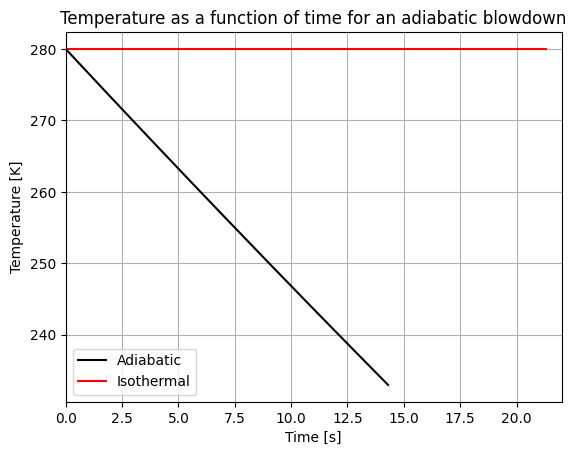

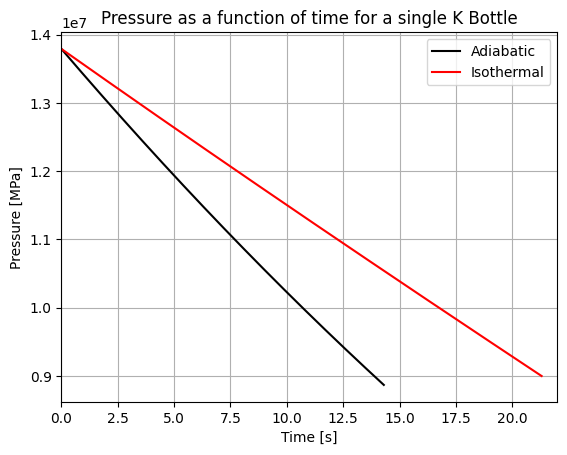

In [5]:
plt.figure()
plt.plot(time_vec, gas_temp, 'k')
plt.plot(time_vec_isotherm, gas_temp_isotherm, 'r')
plt.ylabel("Temperature [K]")
plt.title("Temperature as a function of time for an adiabatic blowdown")
plt.xlabel("Time [s]")
plt.xlim([0,int(np.max(time_vec_isotherm)+1)])
plt.grid()
plt.legend(["Adiabatic", "Isothermal"])


plt.figure()
plt.plot(time_vec, (gas_pressure), 'k')
plt.plot(time_vec_isotherm, (gas_pressure_isotherm), 'r')
plt.ylabel("Pressure [MPa]")
plt.title("Pressure as a function of time for a single K Bottle")
plt.legend(["Adiabatic", "Isothermal"])
plt.xlabel("Time [s]")
plt.xlim([0,int(np.max(time_vec_isotherm)+1)])
plt.grid()

